In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
%matplotlib inline

In [5]:
import os
#path=os.getcwd()
path ='C:\\Users\\Kahar\\\'s\\Documents\\Machine Learning Bijay Explore\\DataMites\\Data'
os.chdir(path)
os.getcwd()

FileNotFoundError: [WinError 3] The system cannot find the path specified: "C:\\Users\\Kahar\\'s\\Documents\\Machine Learning Bijay Explore\\DataMites\\Data"

In [2]:
import os
os.getcwd()

"C:\\Users\\Kahar's\\Documents\\Machine Learning Bijay Explore\\DataMites\\Algorithm"

In [3]:
data = pd.read_csv("iris.csv")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

In [7]:
X=data.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
model =KMeans(n_clusters=3,random_state=3)
model.fit(X)

KMeans(n_clusters=3, random_state=3)

In [9]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [10]:
accuracy_score(model.labels_,data.target)

0.8933333333333333

In [13]:
r2_score(model.labels_,data.target)

0.8161764705882353

In [25]:
#r2_score(Y_test,y_pred)

In [14]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [17]:
#Visualisation 

In [15]:
color =np.array(['red','green','blue'])

Text(0.5, 1.0, 'This is the Flower Data ')

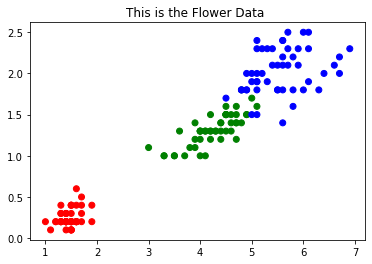

In [16]:
plt.scatter(x=data.petal_length,y=data.petal_width, c=color[data.target])
plt.title("This is the Flower Data ")

Text(0.5, 1.0, 'This is actual data set')

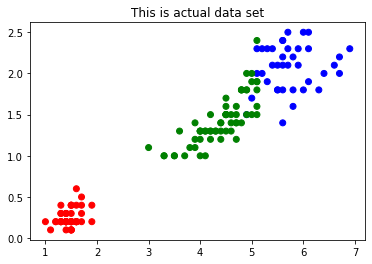

In [20]:
plt.scatter(x=data.petal_length, y=data.petal_width,c=color[model.labels_])
plt.title('This is actual data set')

# Elbow Techineque 

to find no of cluster  or th kmeans from k= to kmeans =17  then we calcualte the distortion (avg diff btw the centroid to the point )

In [18]:
from scipy.spatial.distance import cdist
X=data.iloc[:,:-1]
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [20]:
distortions=[]
K=range(1,17)
for k in K:
        kmeanModel=KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0])

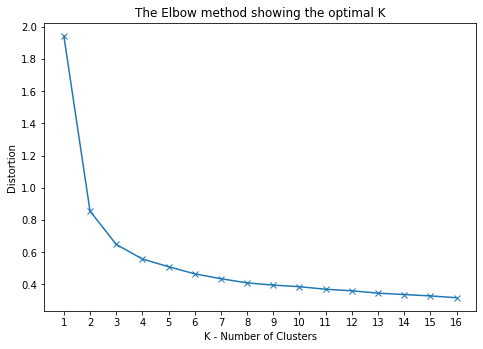

In [21]:
# plot the elbow
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,17))
ax.plot(K,distortions,marker = 'x')

ax.set_xlabel('K - Number of Clusters')
ax.set_ylabel('Distortion')
ax.set_title('The Elbow method showing the optimal K')
plt.show()